  IMPORT IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

IMPORTING DATASET

In [5]:
data=pd.read_csv("/content/ibm-hr-analytics-employee-attrition-performance.zip")
pd.set_option('display.max_columns',None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
data.shape

(1470, 35)

DOMAIN ANALYSIS

1. AGE
- Age of an employee.

2. BUSINESS TRAVEL
- That employee is travelling or not for business purpose.

3. DEPARTMENT
- In which department of company employee is working.

4. DISTANCE FROM HOME
- That how much distance is there of an employee from his\her house to office.

5. HOURLY\DAILY\MONTHLY RATING
- Rating given to employee on daily, hourly & monthly basis.

6. EDUCATION FIELD
- From which education background employee belongs to.

7. JOB AND ENVIRONMENT SATISFACTION
- It is that employee is satisfied with their job well as environment of office (Given in 1-5 ratings).

8. JOB INVOLVEMENT
- How much employee is involved in his work (Given in rating 1-5).

9. JOB LEVEL
- Level of job (Given in rating 1-5), higher rating==higher job level.

10. PERFORMANCE RATING
- How employee is performing according to his job(Given in 1-5 rating).

11. MONTHLY INCOME
- Monthly salary of an employee in dollars

12. PERCENTAGE SALARY HIKE
- How much percent salary is increasing anually.






BASIC CHECKS

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Here information tells us that there is no null values are present in the data.

- However it can be seen that there are 9 features or columns which are of "object" data type.

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- Here two columns(Employ_count,Standard_Hours) have std==0 so ,it means they have unique values it means they are not able to use in analysis.

In [13]:
data.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


- HERE IN OVER18 COLUMN WE ONLY HAVE 1 UNIQUE VALUE SO IT MEANS NO ANALYSIS DONE ON IT.

EDA(EXPLORATORY DATA ANALYSIS)

ANALYSIS ON CATEGORICAL COLUMNS W.R.T TARGET COLUMN(ATTRITION)

TARGET COLUMN==ATTRITION

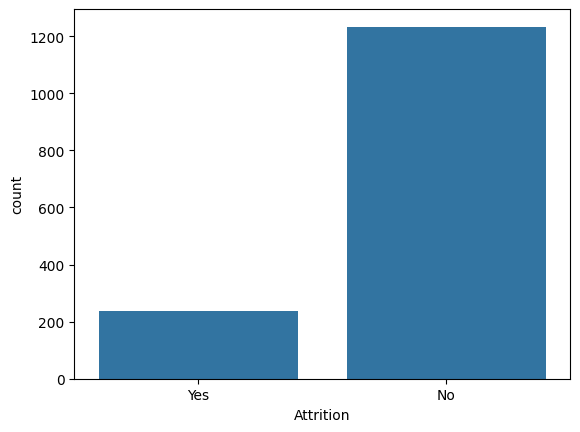

In [14]:
sns.countplot(x=data.Attrition)
plt.show()

- Data of attrition says that it has more number of "No" values and less number of "Yes".
- It can be seen that there is big difference in counts of the values so we can say that it is IMBALANCE DATA

1. IMPACT OF BUSINESS TRAVEL ON ATTRITION

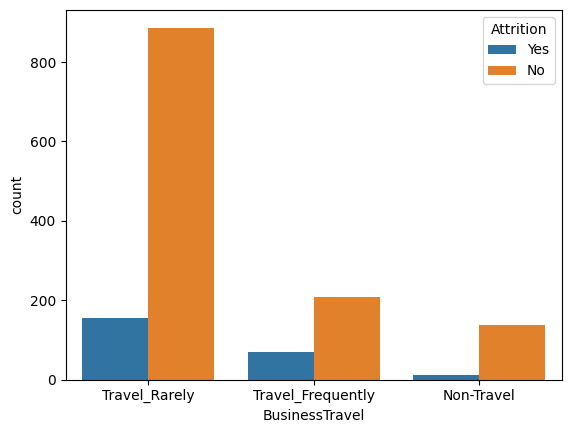

In [15]:
sns.countplot(hue=data.Attrition,x=data.BusinessTravel)
plt.show()

- Graph tells us that company has more count or more no.of employees who travels rarely.it means travel rate of company is less.
- There are more employes which travels rarely and are not satisfied with their job.
- Non-traveller have least count as well as least attrition.

2. IMPACT OF DEPARTMENT ON ATTRIRTION

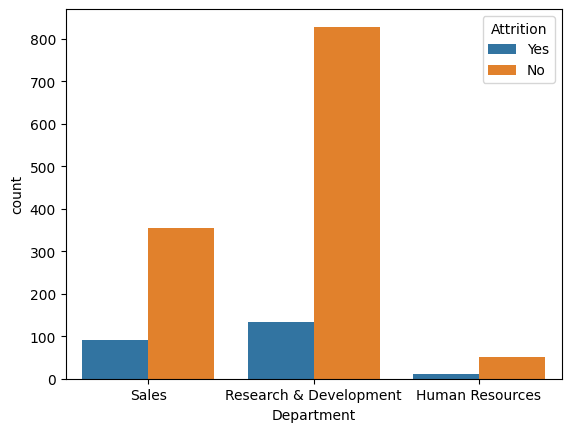

In [16]:
sns.countplot(hue=data.Attrition,x=data.Department)
plt.show()

- There are 3 no.of department are there --> 1.Sales, 2.Research and Development, 3.HR department.
- "Research and Development" department have more number of Attrition (150 EMPLOYEES) as compared to other two department.
- "HR Department" have least Attrition with just 5 to 10 employees.

3. IMPACT OF EDUCATION FIELD ON ATTRITION

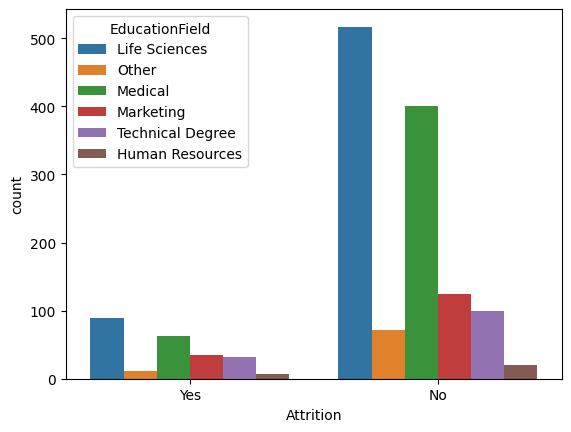

In [17]:
sns.countplot(x=data.Attrition,hue=data.EducationField)
plt.show()

- First and foremost thing is that Employees who are from "Life Science" and "Medical" backgrounds are more as compared to other edication fields.

- Nearby 100 number of employees are there who are from life science education background will leave the company and followed by medical education employees.
- As we conclude from analysis of Department and Attrition, here also HR educational background employees have least Attrition.

4. GENDER AND ATTRITION

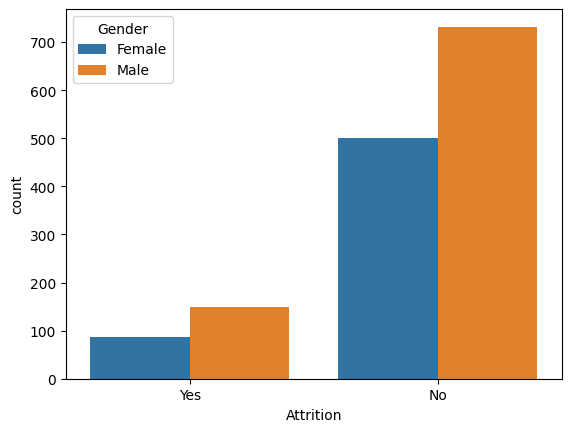

In [18]:
sns.countplot(x=data.Attrition,hue=data.Gender)
plt.show()

- Male employees are more as compared to Females.
- Males are more likely to quit the job rather than Females.

5. OVERTIME AND ATTRITION

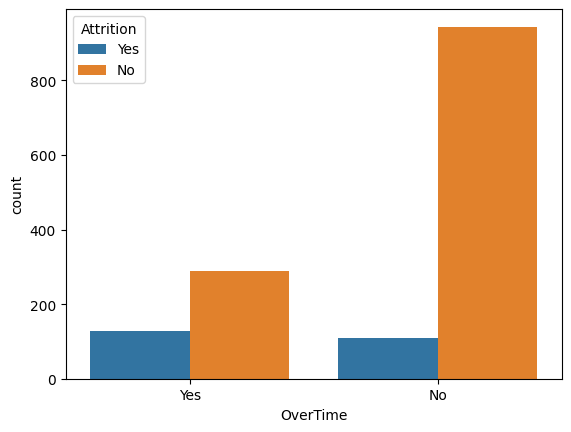

In [19]:
sns.countplot(hue=data.Attrition,x=data.OverTime)
plt.show()

- As for "Attrition yes", there is minor difference between the Employees who are doing overtime and who are not doing overtime.
- So we can say that Overtime feature is not much effecting Attrition.
- But we can conclude that most of employees are not doing overtime.

6. IMPACT OF JOB ROLE ON ATTRITION

Text(0.5, 0, 'JobRole')

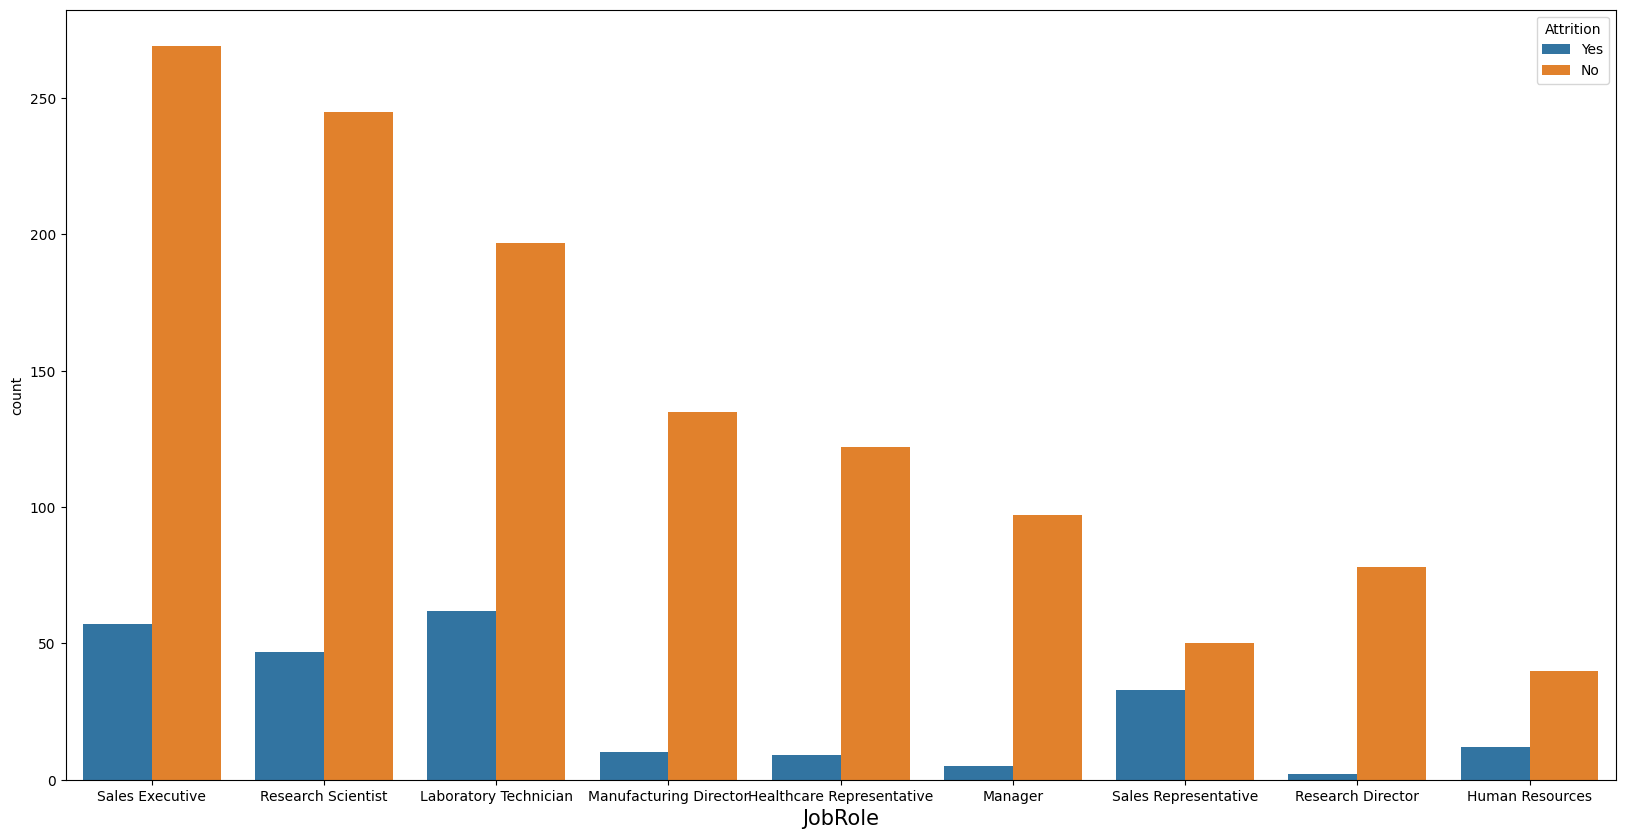

In [22]:
plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x='JobRole',hue='Attrition',data=data)
plt.xlabel('JobRole',fontsize=15)

- There are less no.of Research Director who leaves the company.
- Laboratory Technician, Sales Excecutive and Research Scientist are the top 3 job roles in which employees have their Attrition "Yes".
- Apart from these it can also seen that there are more number of employees in Sales Excecutive job role.

ANALYSIS ON CONTINOUS DATA W.R.T TARGET COLUMN

In [23]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == 'int64' and len(data[column].unique()) >= 10:   #for continous features we use unique>= 10
        numerical_col.append(column)

In [24]:
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

GRAPHICAL REPRESENTATION OF CONTINOUS DATA

In [25]:
data2=data[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

ANOTHER METHOD OF VISUALISATION

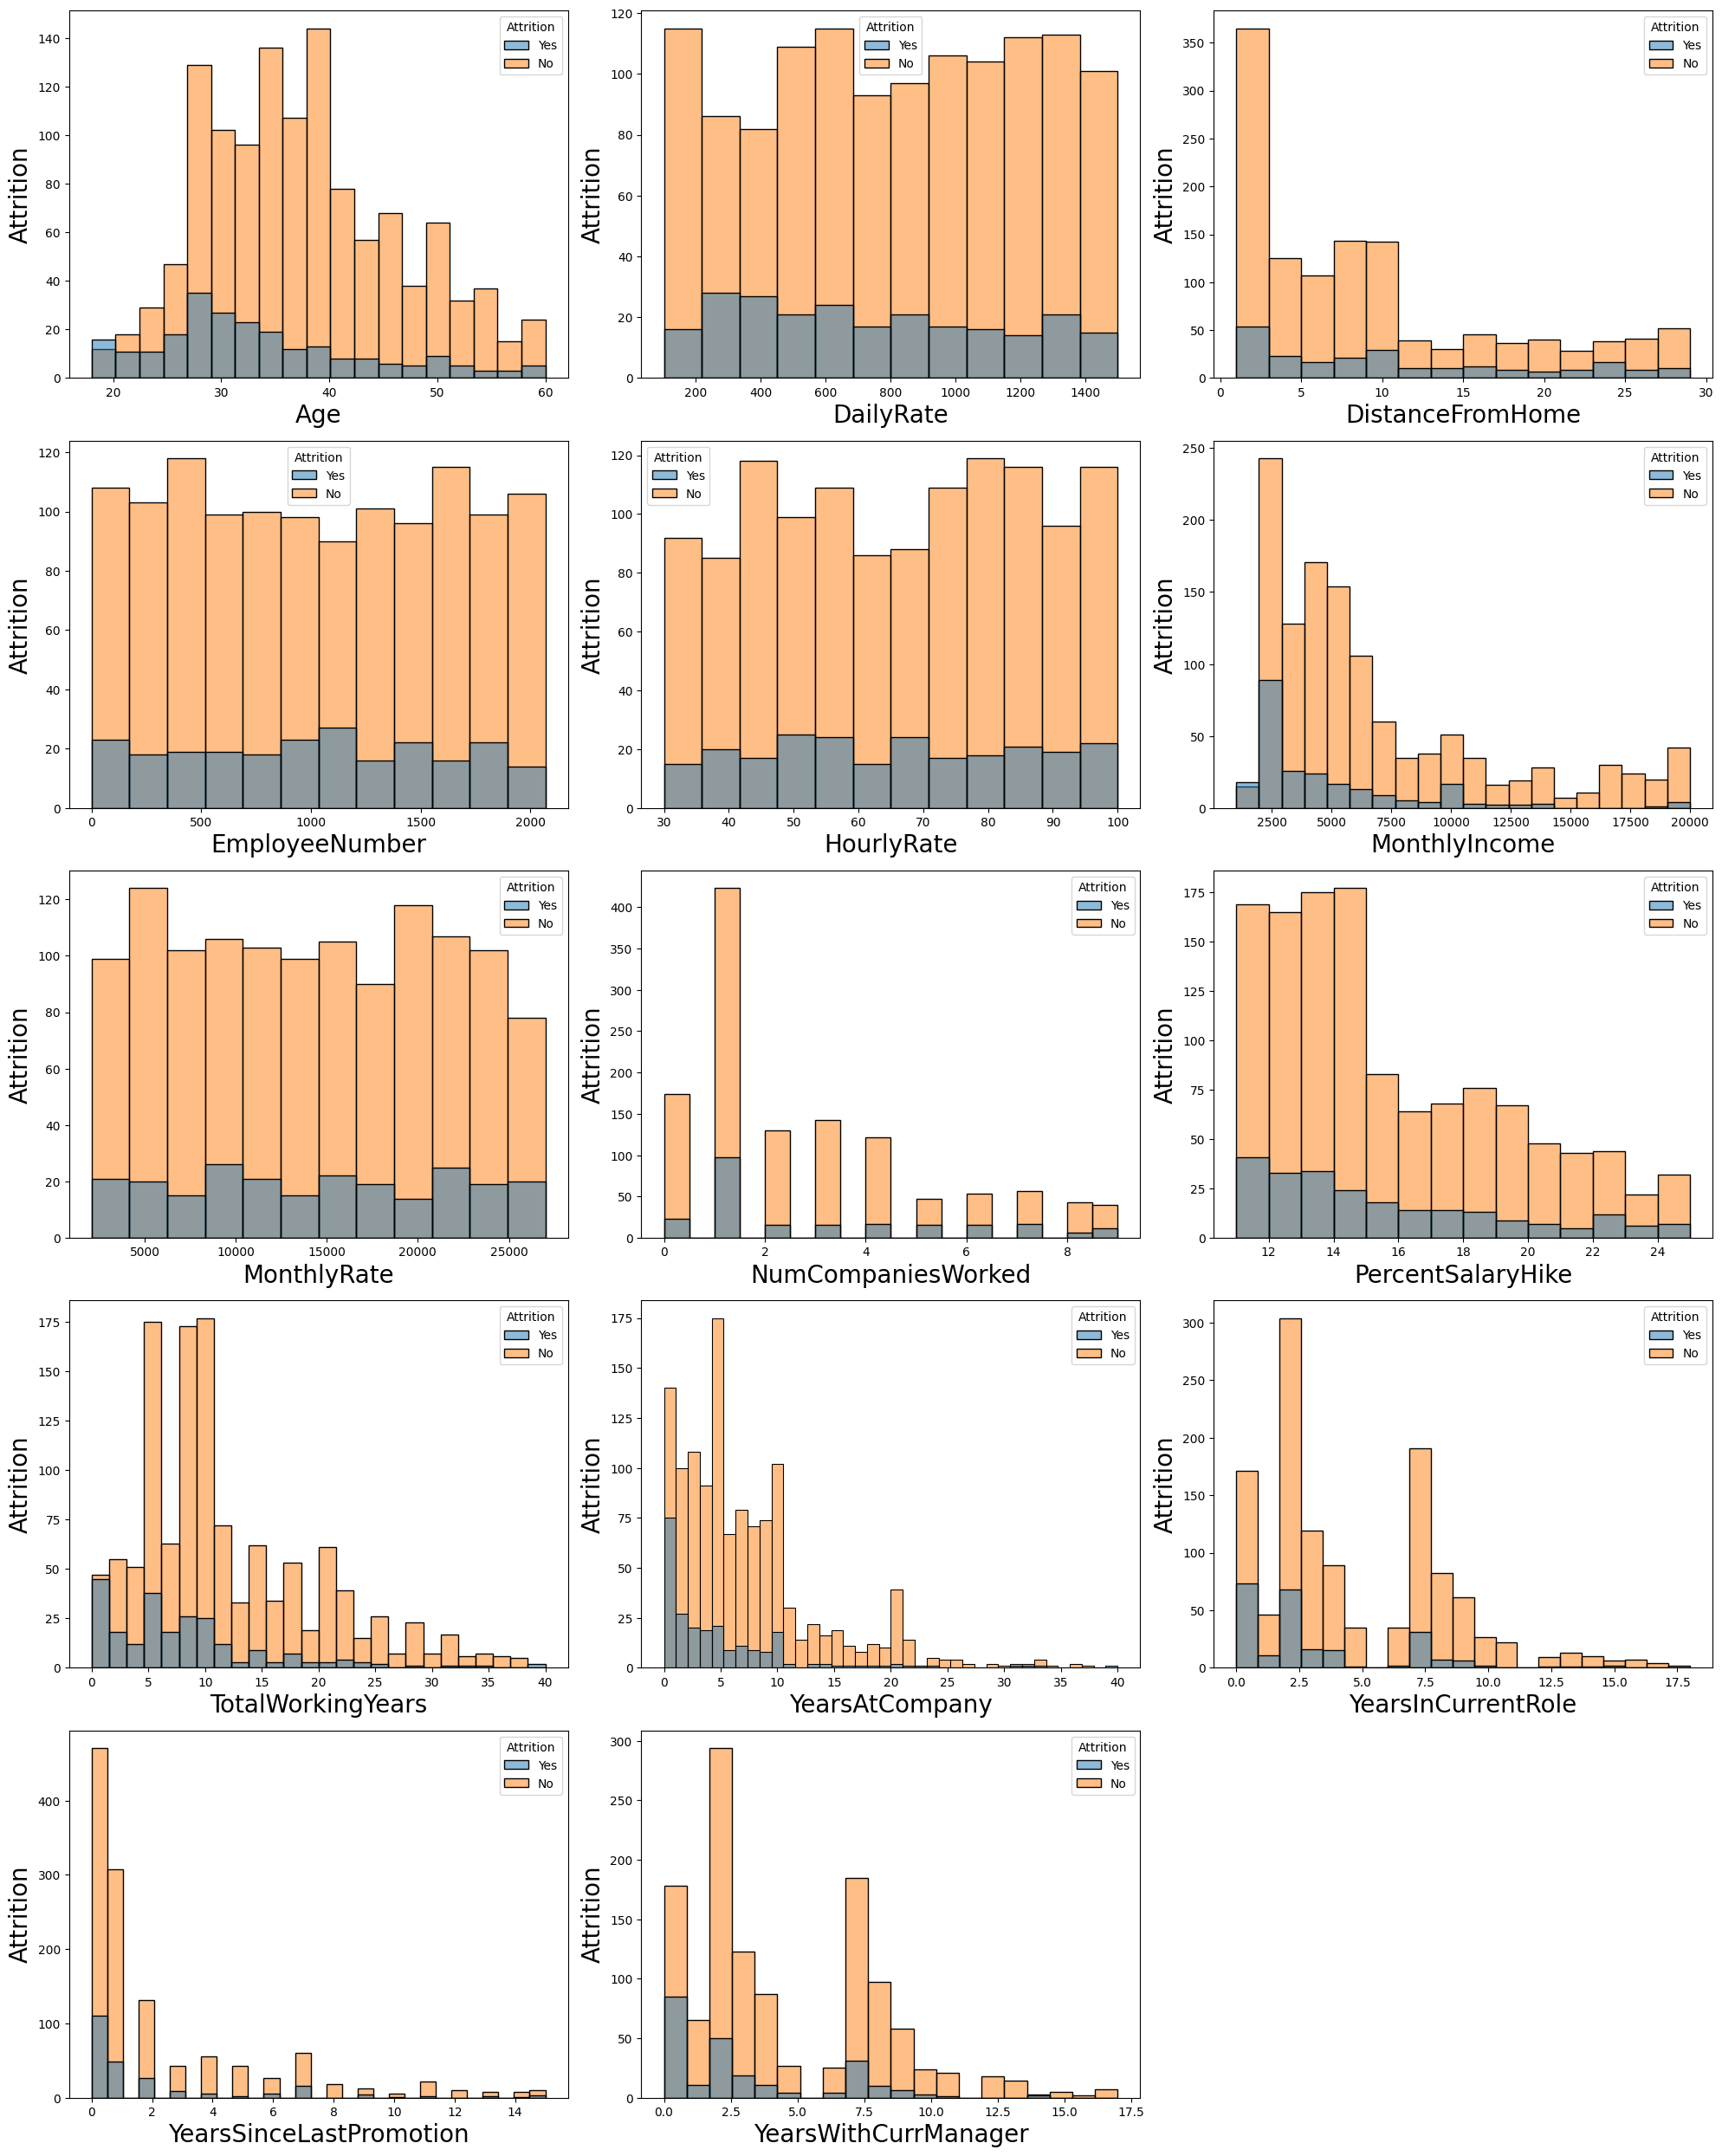

In [27]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(x=data2[column].dropna(axis=0)
        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

1. IMPACT OF AGE ON ATTRITION

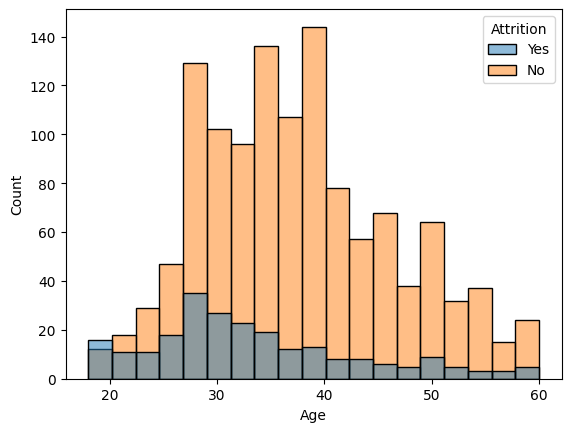

In [28]:
sns.histplot(hue=data.Attrition,x=data.Age)
plt.show()

- Employees in age of 25 to 35 are more likely to leave the job.
- After 40 age, the distribution tells us that "Higher the age lesser will be the attrition".

2. DISTANCE FROM HOME AND ATTRITION

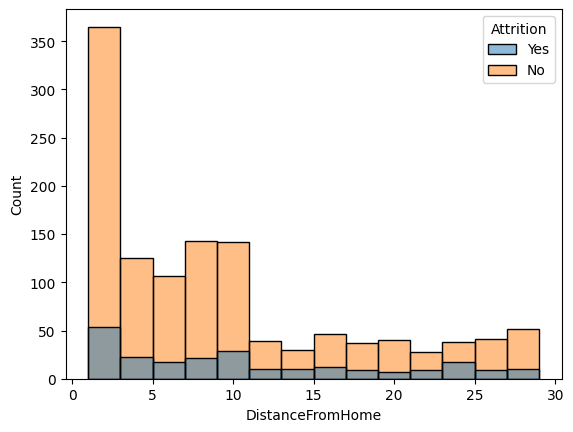

In [29]:
sns.histplot(hue=data.Attrition,x=data.DistanceFromHome)
plt.show()

- Employees who has distance range of 0-10km, are more likely to leave the job.

- We can also conclude that lesser the distance more number of employees are working.

3. HOW MONTHLY INCOME GIVES TRENDS W.R.T ATTRITION

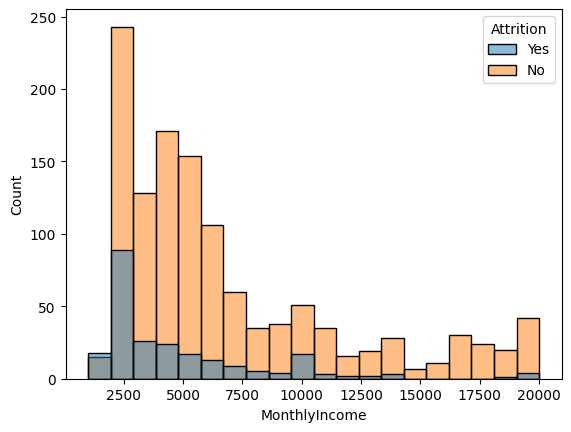

In [31]:
sns.histplot(hue=data.Attrition,x=data.MonthlyIncome)
plt.show()

- Higher the monthly income give rise to less Attrition(means Attrition "No").
- Employees who have their income approx. 2500 are more likely to their job,because 2500 is the least range of income.

4. IMPACT OF NO. OF COMPANIES *WORKED*

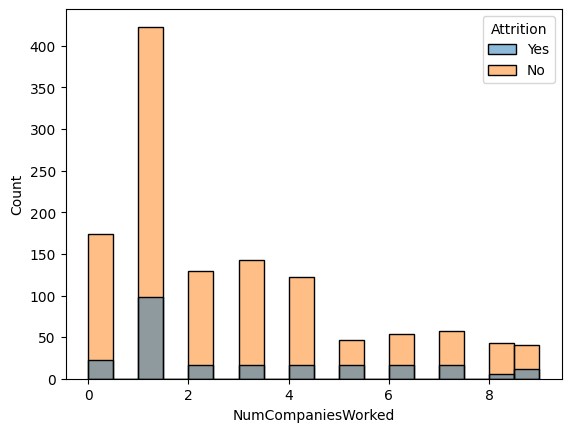

In [32]:
sns.histplot(hue=data.Attrition,x=data.NumCompaniesWorked)
plt.show()

- Only that employees (no.of emp = 100) who worked with 1 company before have most Attrition (Attrition "Yes"), rest have similar data.

5. HOW SALARY HIKE IS IMPACTING THE ATTRITION

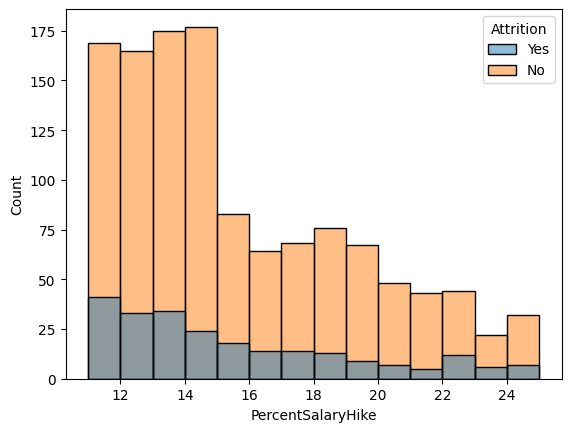

In [33]:
sns.histplot(hue=data.Attrition,x=data.PercentSalaryHike)
plt.show()

- Higher the salary percentage hike, Lesser the Attrition("No").

6. YEARS AT THE COMPANY

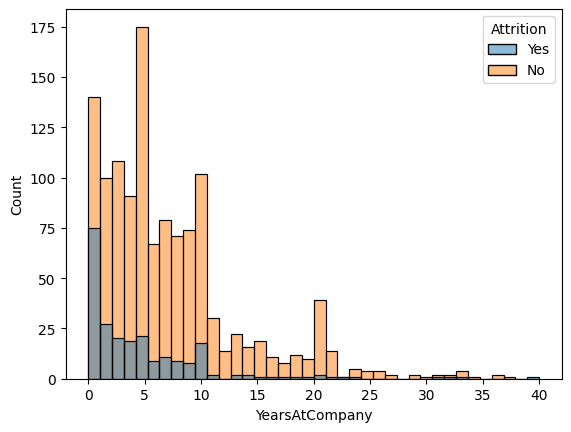

In [34]:
sns.histplot(hue=data.Attrition,x=data.YearsAtCompany)
plt.show()

- Freshers have higher data of "Attrition Yes" that is of 75 no.of workers or more than half of fresher.
- Apart from this Employees who ranges from 1 to 10 year working on this company are also likely to quit their job.

ANALYSIS OF DISCRETE DATA W.R.T TARGET COLUMN

In [35]:
discrete_col = []
for column in data.columns:
    if data[column].dtype == 'int64' and len(data[column].unique()) <= 10:
        discrete_col.append(column)

In [36]:
data3=data[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]

GRAPHICAL REPRESENTATION

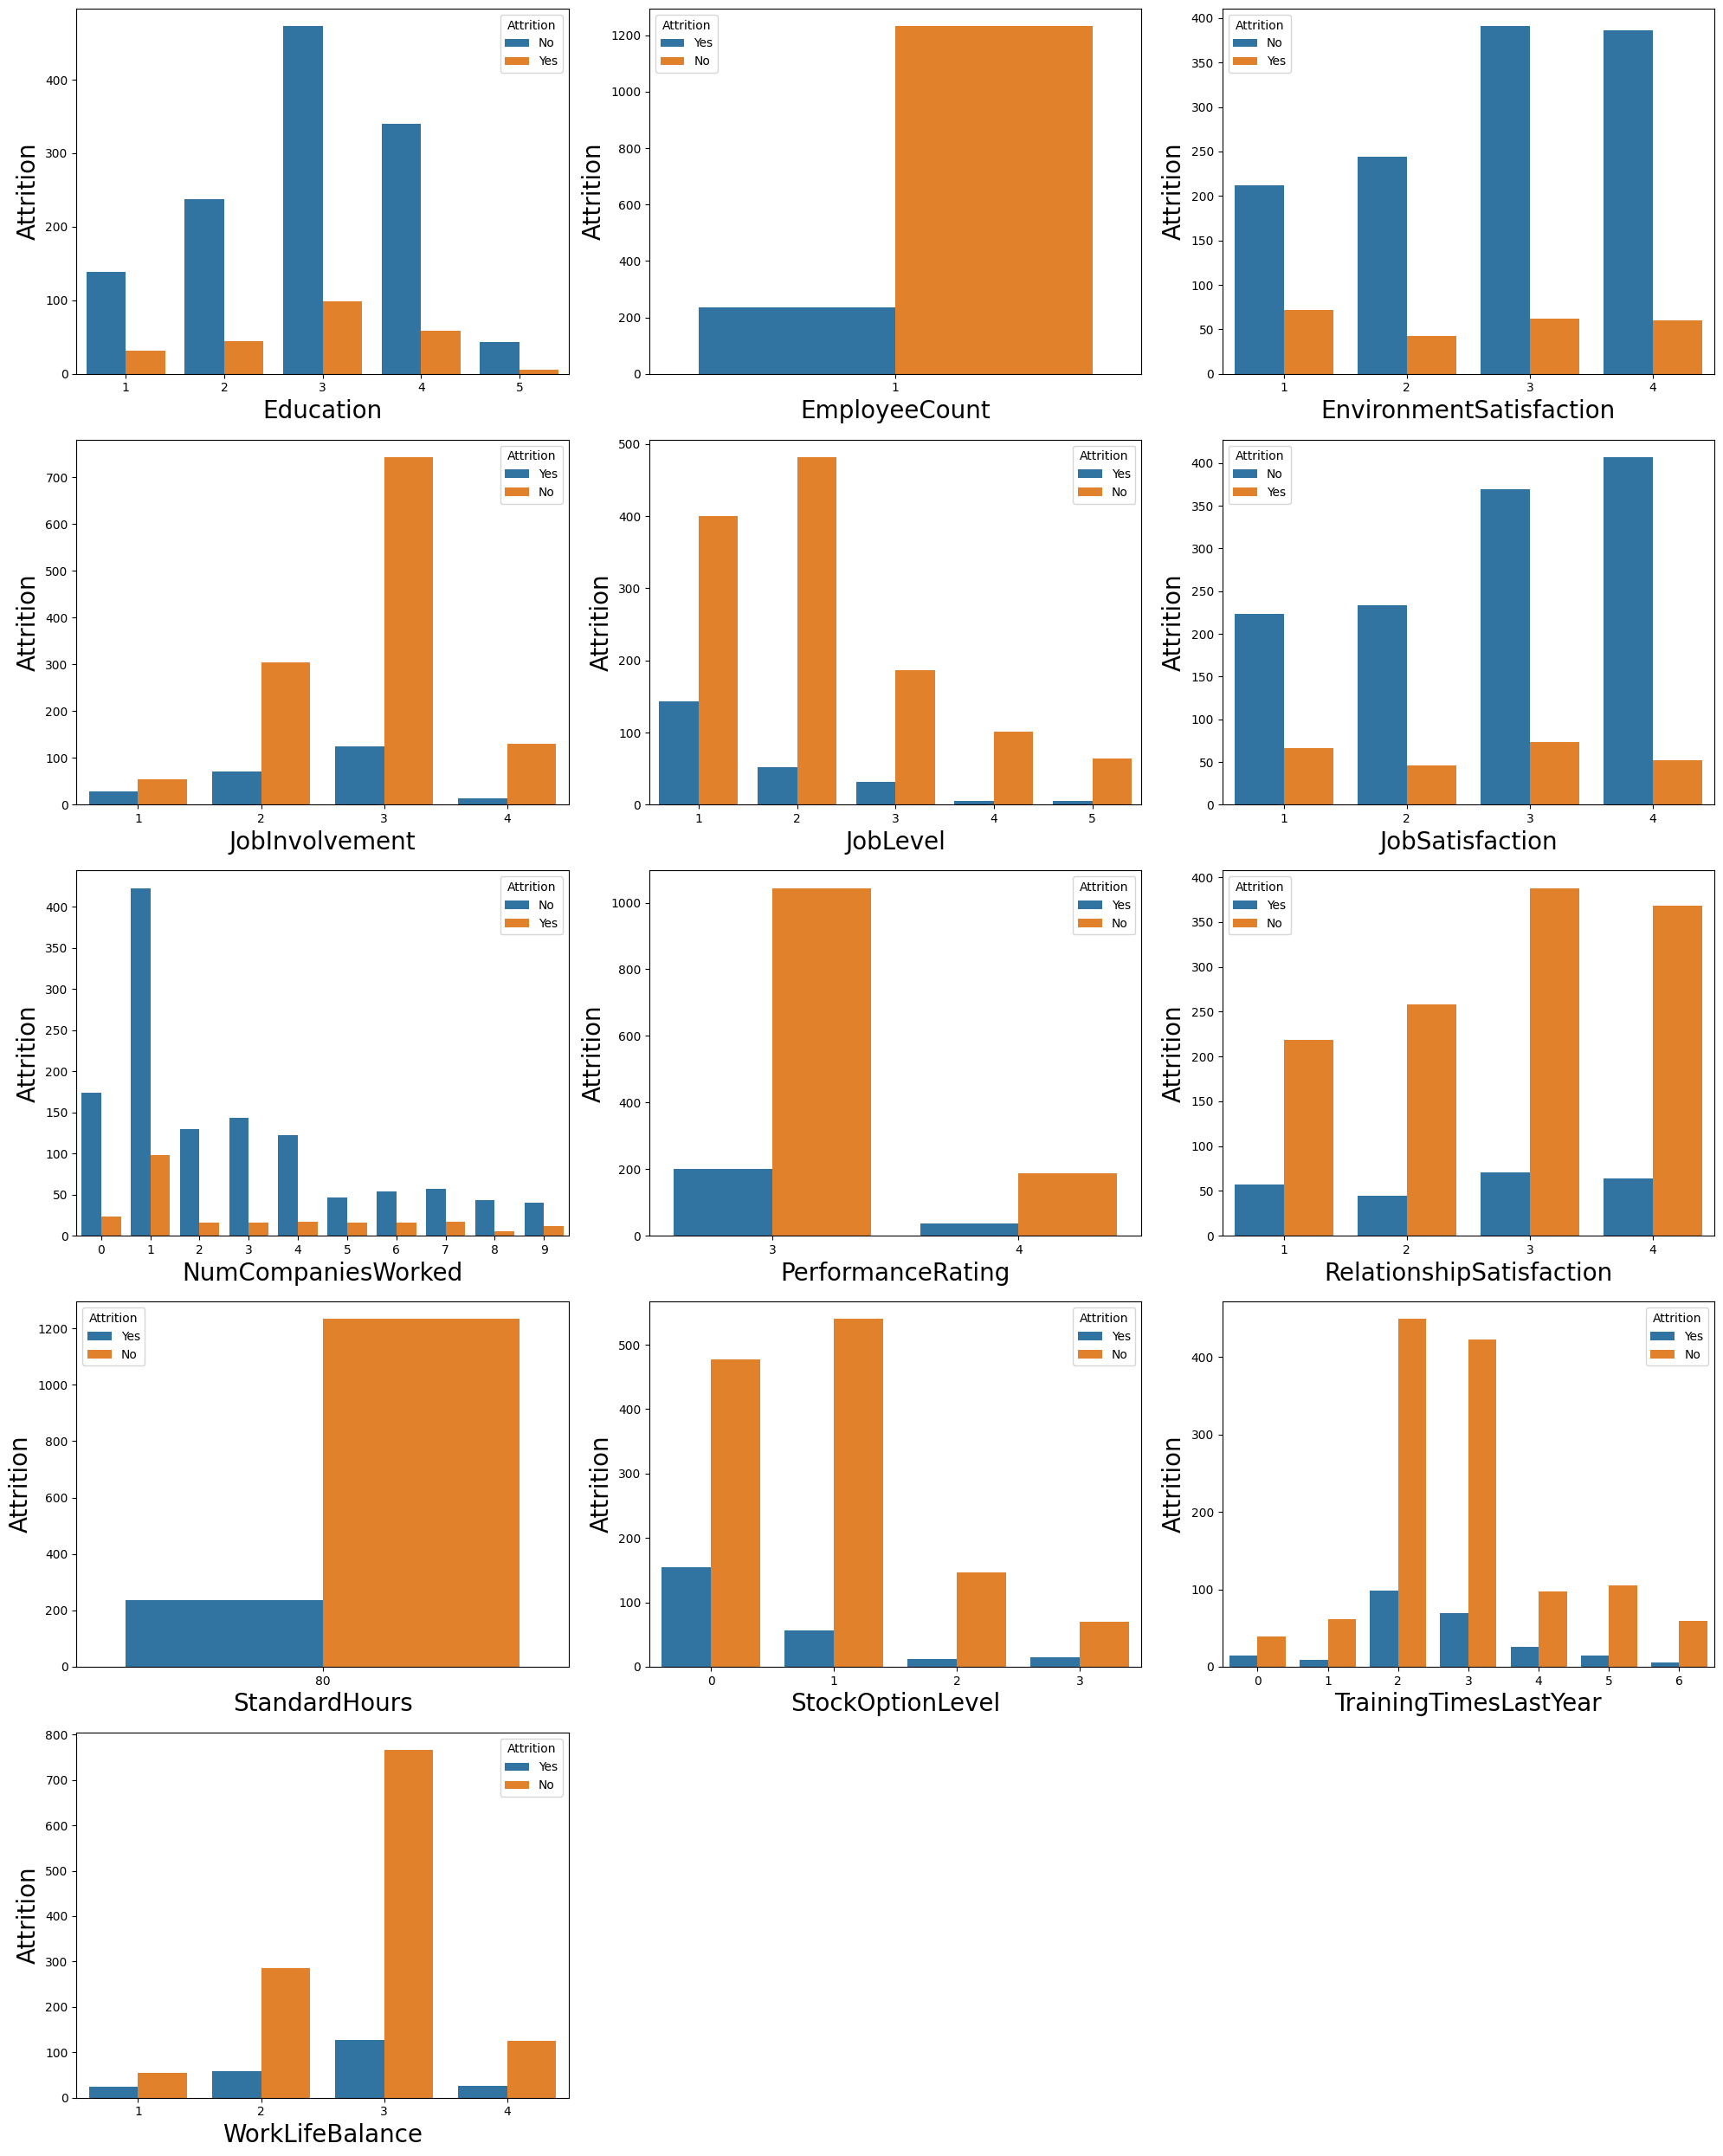

In [37]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data3:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.countplot(x=data3[column].dropna(axis=0)
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

1. IMPACT OF ENVIRONMENT AND JOB SATISFACTION ON ATTRITION

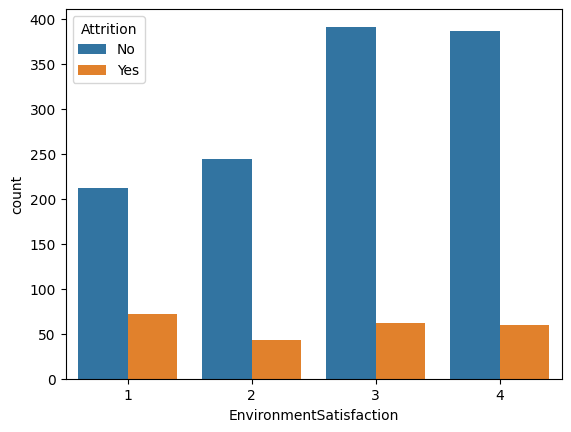

In [38]:
sns.countplot(hue=data.Attrition,x=data.EnvironmentSatisfaction)
plt.show()

- Increase in job level, Decrease in chances of leaving the company for Employess.

2. JOB INVOLVEMENT IMPACTING ON ATTRITION

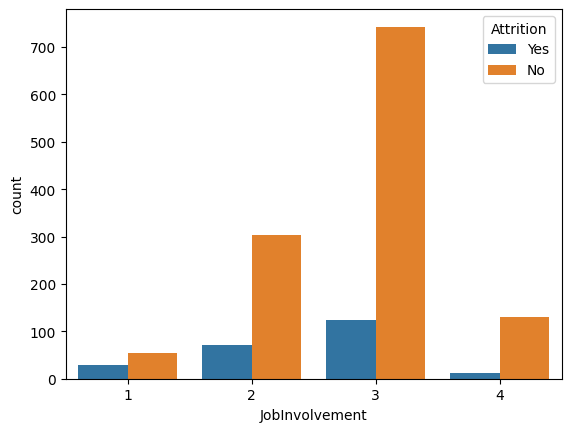

In [39]:
sns.countplot(hue=data.Attrition,x=data.JobInvolvement)
plt.show()

- Increase in job level, Decrease in chances of leaving the company for employees.

3. IMPACT OF STOCK OPTION LEVEL ON ATTRITION

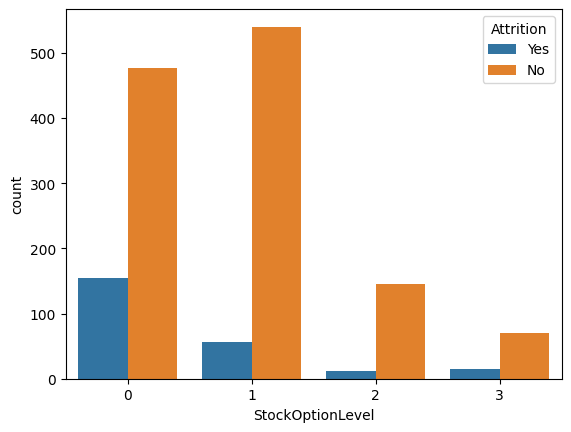

In [40]:
sns.countplot(hue=data.Attrition,x=data.StockOptionLevel)
plt.show()

- The employees who involved in job more than sufficient are more likely to quit or we can say that they have more pressure of work.
- Something there are some emp. Who are not involved fully in there job but still they are likely to quit.

4. PERFORMANCE RATING AND ATTRITION

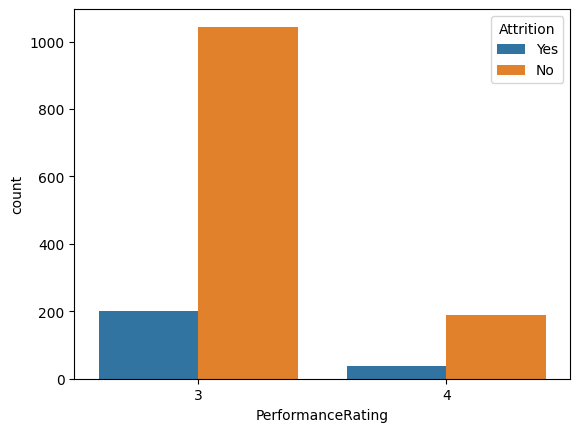

In [41]:
sns.countplot(hue=data.Attrition,x=data.PerformanceRating)
plt.show()

- For the employees who're not having stock option are likely to quit.

ADVANTAGES OF DATA ANALYSIS
- Make decisions at the speed of your business.
- Increase business optimization.
- Quickly detect and address operational issues.
- Improve customer service with up-to-data information.

DATA PREPROCESSING

In [42]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

CATEGORICAL DATA HANDLING

In [43]:
data.Attrition=data.Attrition.map({'Yes':1,'No':0})

In [44]:
data.BusinessTravel=data.BusinessTravel.map({'Travel_Rarely':2,'Travel_Frequently':1, 'Non-Travel':0})

In [45]:
data.Department=data.Department.map({'Sales':1,'Research & Development':2,'Human Resources':0})

In [46]:
data.EducationField=data.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0})

In [47]:
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

In [48]:
data.JobRole=data.JobRole.map({'Sales Executive':1,'Research Scientist':2,'Laboratory Technician':3,'Manufacturing Director':4,'Healthcare Representative':5,'Manager':6,'Sales Representative':7,'Research Director':8,'Human Resources':9,'Sheikh':10})

In [49]:
data.MaritalStatus=data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [50]:
data.OverTime=data.OverTime.map({'Yes':1,'No':0})

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   bool  
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

FEATURES SELECTION

DROPING UNIQUE ONES

In [52]:
data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

MODEL CREATION

In [53]:
x=data.drop('Attrition',axis=1)
y=data["Attrition"]

BALANCE THE TARGET COLUMN USING SMOTE

In [54]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote=SMOTE()
print("unbalanced data: ",Counter(y))
x_smote,y_smote=smote.fit_resample(x,y)
print("balanced data: ",Counter(y_smote))

unbalanced data:  Counter({0: 1233, 1: 237})
balanced data:  Counter({1: 1233, 0: 1233})


TRAIN-TEST-SPLIT

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [62]:
data.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

MODEL BUILDING

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

PREDICTION

In [61]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,

In [63]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       250
           1       0.80      0.84      0.82       244

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



CHECKING IF THE DATA IS FULLY TRAINED OR NOT

In [65]:
train_pred=dt.predict(x_train)

In [66]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       989

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



RANDOM FOREST TECHNIQUE

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc=RandomForestClassifier(n_estimators=100)

In [69]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
y_pred=rfc.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       250
           1       0.94      0.89      0.91       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

